<a href="https://colab.research.google.com/github/NoahHertog/PRA3024/blob/main/Gravitational_waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Challenge 1:

In [1]:
%reset -s

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


In [2]:

! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
# -- Click "restart runtime" in the runtime menu
# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
# -- for gwpy
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")
# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


Sampling rate:

In [3]:
1/pycbc_strain.delta_t #sampling rate'

4096.0

Total time of data:

In [4]:
1/pycbc_strain.delta_f #duration

128.0

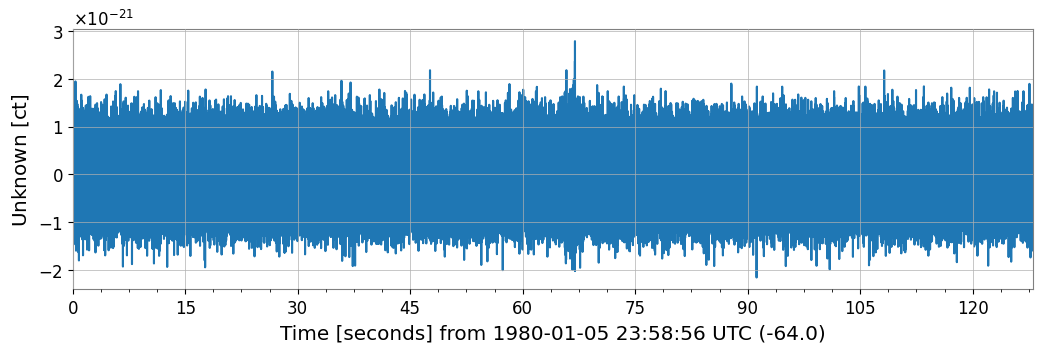

In [5]:
plot = gwpy_strain.plot()

Simple spectrogram, this shows a slight sign something is happening arount t=65

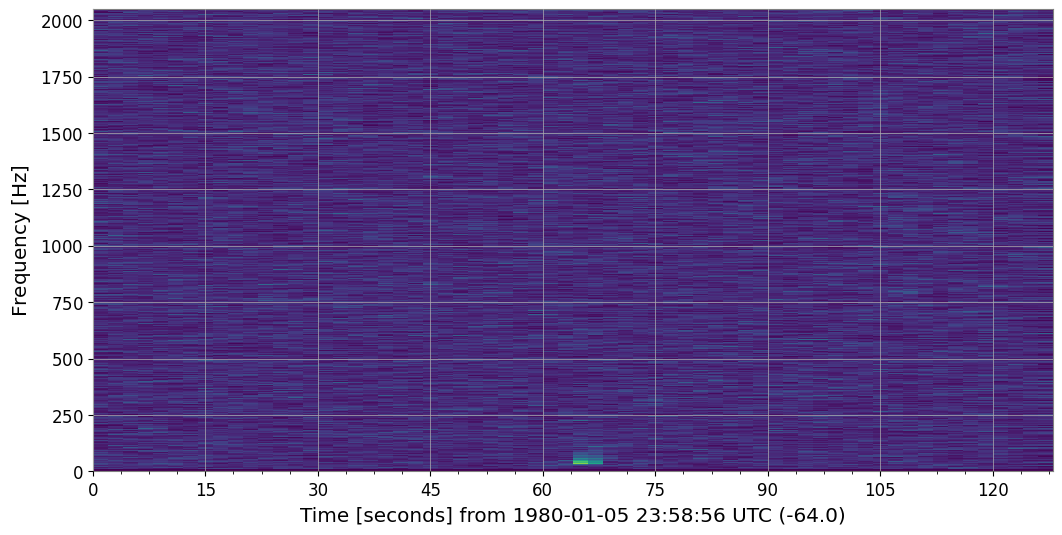

In [6]:
data=gwpy_strain
spectdata=data.spectrogram2(fftlength=4, overlap=2, window='hann') ** (1/2.)
plot = spectdata.plot()

In [7]:
spectdata.min()

<Quantity 2.01459722e-29 ct / Hz(1/2)>

In [8]:
spectdata.max()

<Quantity 7.67895517e-23 ct / Hz(1/2)>

a q-transform of the data shows very clearly the signal of the merger happening around t=66-67

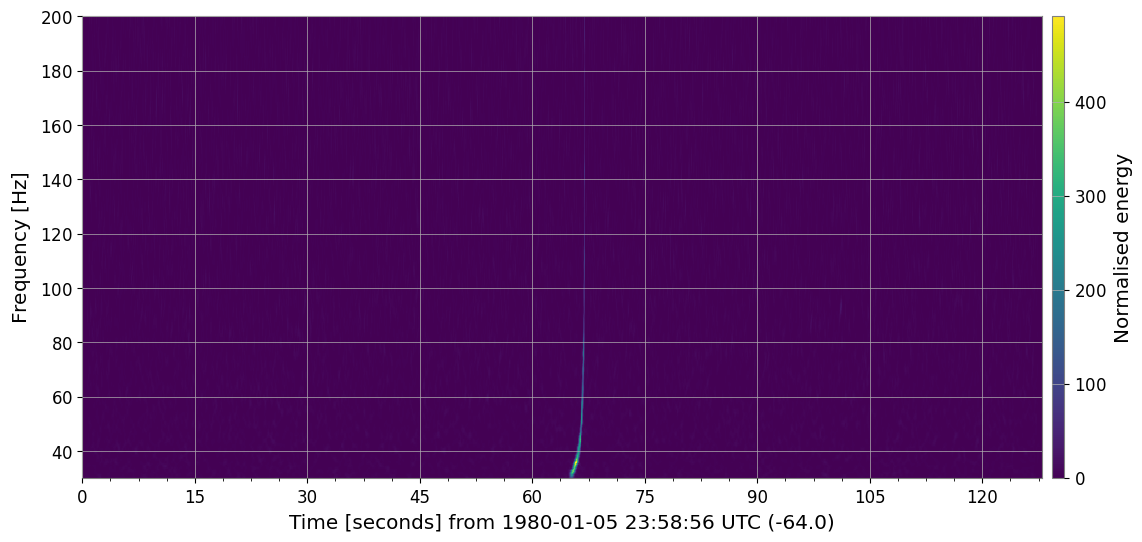

In [9]:
from pycbc.filter import matched_filter
import numpy
hq = gwpy_strain.q_transform(frange=(30, 200), qrange=(50, 80))
plot = hq.plot()
plot.colorbar(label="Normalised energy")


Challenge 2:

In [10]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
# -- for gwpy
from gwpy.timeseries import TimeSeries
gwpy2_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")
# -- for pycbc
from pycbc import frame
pycbc2_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')
#nyquist frequency is half of max frequency
#matched filter NSR is value of peak

--2024-02-25 13:00:19--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://gwosc.org/s/workshop3/challenge/challenge2.gwf [following]
--2024-02-25 13:00:20--  https://gwosc.org/s/workshop3/challenge/challenge2.gwf
Resolving gwosc.org (gwosc.org)... 131.215.113.73
Connecting to gwosc.org (gwosc.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  7.42MB/s    in 0.5s    

2024-02-25 13:00:21 (7.42 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



In [11]:
1/pycbc2_strain.delta_t

4096.0

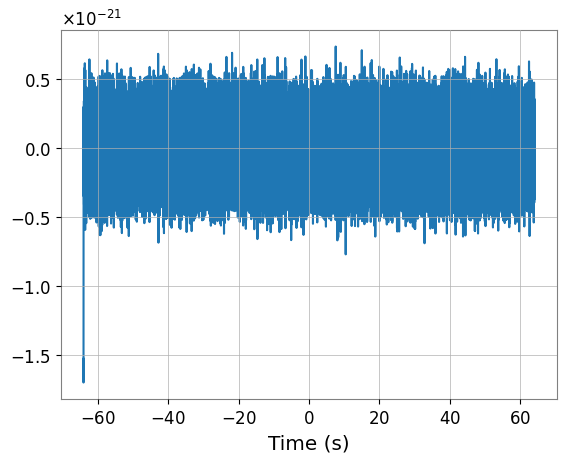

In [12]:
%matplotlib inline

import pylab

from pycbc.filter import resample_to_delta_t, highpass


# Get the data from the Hanford detector
strain = pycbc2_strain

# Remove the low frequency content and downsample the data to 2048Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()


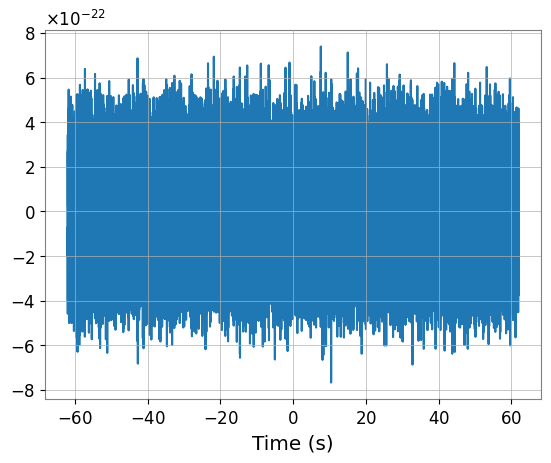

In [13]:
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [14]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency.
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=15)

In [15]:
from pycbc.waveform import get_td_waveform

m = 30 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

Text(0, 0.5, 'Strain')

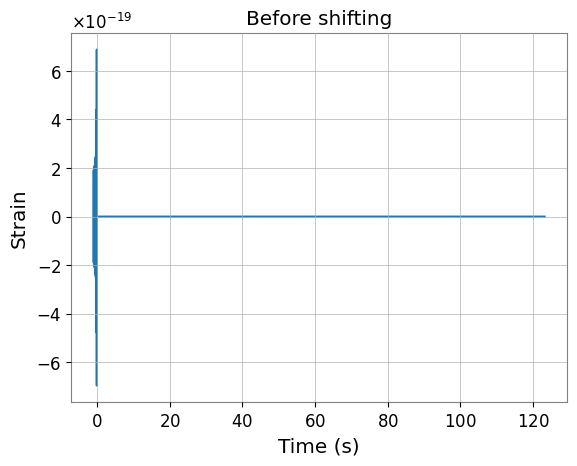

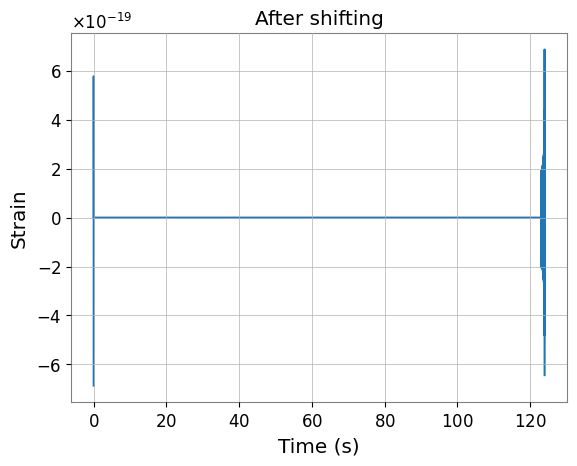

In [16]:
# Let's plot the signal before and after shifting

pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

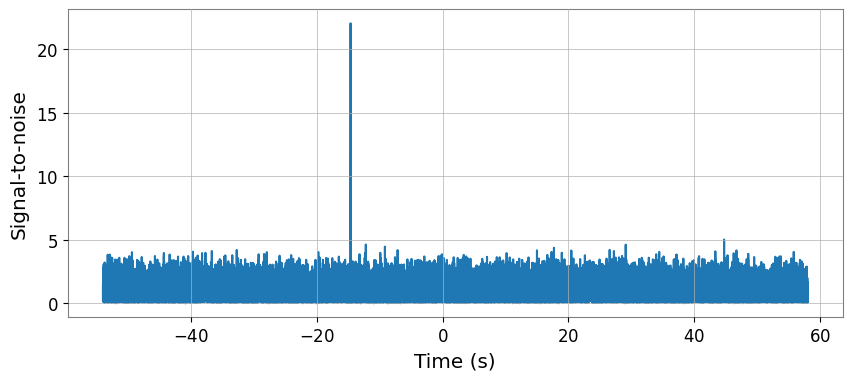

We found a signal at -14.6328125s with SNR 22.054545591712557


In [17]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

# Remove time corrupted by the template filter and the psd filter
# We remove 4 seconds at the beginning and end for the PSD filtering
# And we remove 4 additional seconds at the beginning to account for
# the template length (this is somewhat generous for
# so short a template). A longer signal such as from a BNS, would
# require much more padding at the beginning of the vector.
snr = snr.crop(4 + 4, 4)

# Why are we taking an abs() here?
# The `matched_filter` function actually returns a 'complex' SNR.
# What that means is that the real portion correponds to the SNR
# associated with directly filtering the template with the data.
# The imaginary portion corresponds to filtering with a template that
# is 90 degrees out of phase. Since the phase of a signal may be
# anything, we choose to maximize over the phase of the signal.
pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

The signal peaks at t=-14.63s. This is when the merger happened

Assignment set 2 problem 2:

Text(0, 0.5, 'strain')

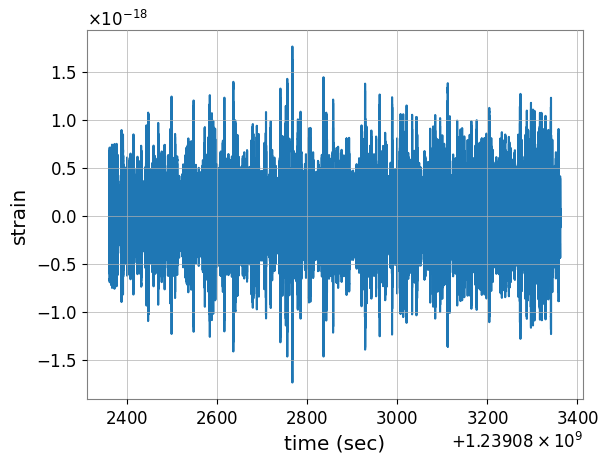

In [18]:

import numpy as np
import pycbc
from pycbc.types import FrequencySeries, TimeSeries
#Make sure the file "noise_ts_4096Hz.npy" is in the directory.
import matplotlib.pyplot as plt
d = np.load("noise_ts_4096Hz.npy") #loads and formats the data file
time = d[:, 0]
d = pycbc.types.TimeSeries(d[:, 1], delta_t = time[1]-
time[0])
data = d
plt.plot(time, data)
plt.xlabel('time (sec)')
plt.ylabel('strain')

In [19]:
psd.delta_f

0.008064516129032258

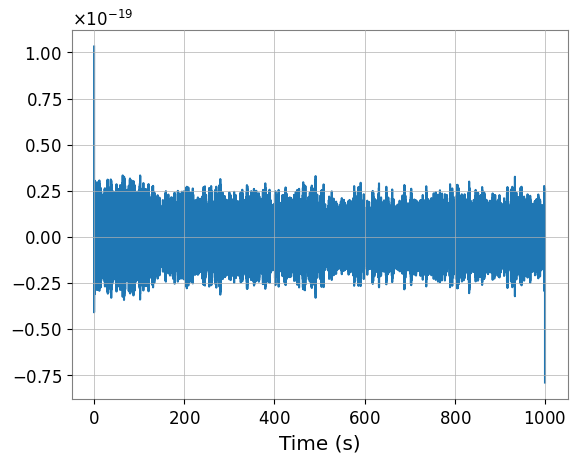

In [20]:
%matplotlib inline

import pylab

from pycbc.filter import resample_to_delta_t, highpass

strain = d

# Remove the low frequency content and downsample the data to 4096Hz
strain = highpass(strain, 15.0)
strain = resample_to_delta_t(strain, 1.0/4096)


pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.show()


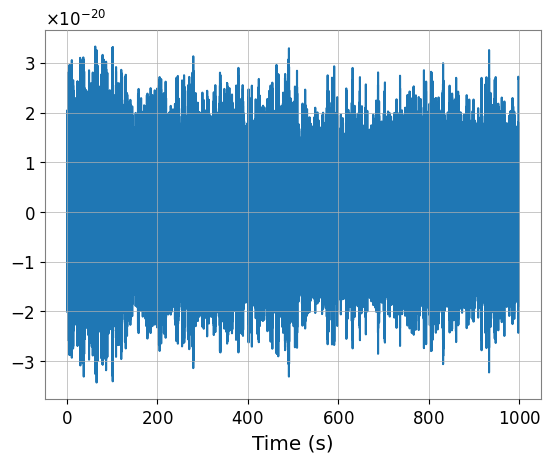

In [21]:
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

In [22]:
from pycbc.psd import interpolate, inverse_spectrum_truncation
# Estimate the power spectral density

# We use 4 second samples of our time series in Welch method.
psd = conditioned.psd(4)

# Now that we have the psd we need to interpolate it to match our data
# and then limit the filter length of 1 / PSD. After this, we can
# directly use this PSD to filter the data in a controlled manner
psd = interpolate(psd, conditioned.delta_f)

# 1/PSD will now act as a filter with an effective length of 4 seconds
# Since the data has been highpassed above 15 Hz, and will have low values
# below this we need to inform the function to not include frequencies
# below this frequency.
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=20)

In [23]:
from pycbc.waveform import get_td_waveform

masses = [5, 6, 7, 8, 9, 10]
waveforms = []

#Generate and resize waveform
for mass in masses:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                             mass1=mass,
                             mass2=mass,
                             delta_t=1.0/4096,
                             f_lower=15)
    hp.resize(len(conditioned))
    waveforms.append((hp, hc))


templates = [waveform[0].cyclic_time_shift(waveform[0].start_time) for waveform in waveforms]




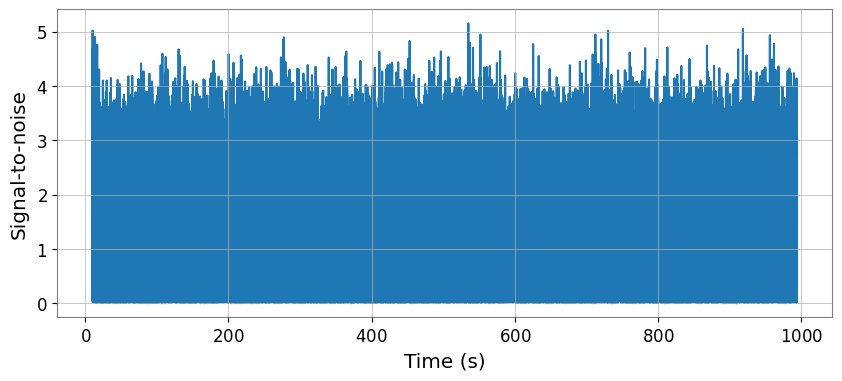

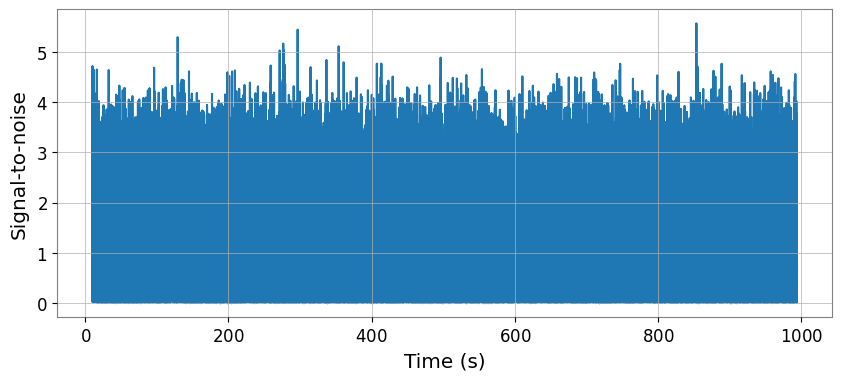

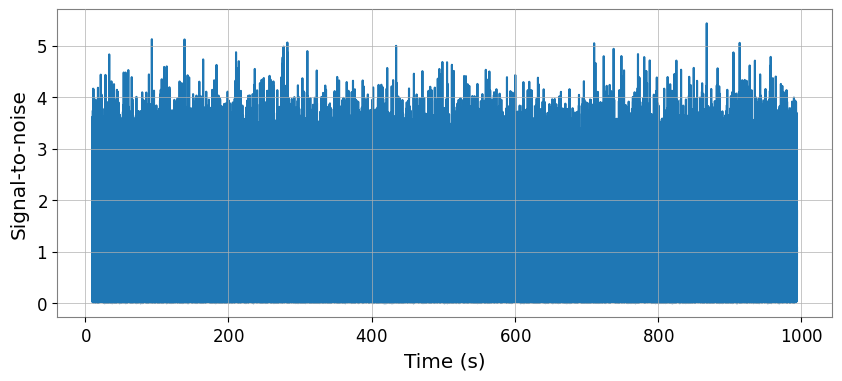

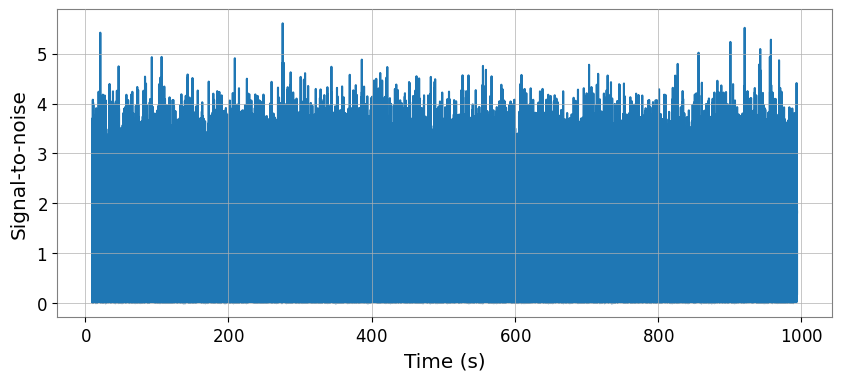

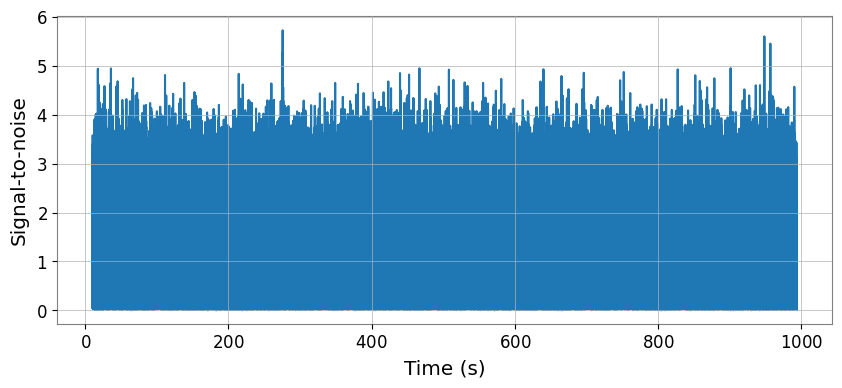

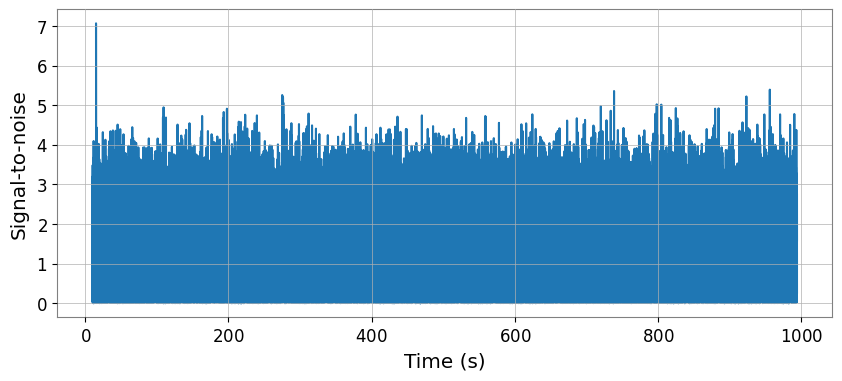

For mass 5: We found a signal at 534.9436035152501s with SNR 5.15594175880245
For mass 6: We found a signal at 853.4895019527502s with SNR 5.566812009473583
For mass 7: We found a signal at 867.9206542965002s with SNR 5.432524148763691
For mass 8: We found a signal at 275.68334960900006s with SNR 5.604917764955302
For mass 9: We found a signal at 275.62963867150006s with SNR 5.723279353154824
For mass 10: We found a signal at 14.990234374625s with SNR 7.06481711191155


In [29]:
from pycbc.filter import matched_filter
import numpy
import pylab

snrs = []

for i, template in enumerate(templates, start=5):
    snr = matched_filter(template, conditioned, psd=psd, low_frequency_cutoff=20)

    #Remove time corrupted by the template filter and the psd filter
    snr = snr.crop(4 + 4, 4)
    snrs.append(snr)

#plot
    pylab.figure(figsize=[10, 4])
    pylab.plot(snr.sample_times, abs(snr))
    pylab.ylabel('Signal-to-noise')
    pylab.xlabel('Time (s)')
    pylab.show()


#find peak

for i, snr in enumerate(snrs, start=5):
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    print("For mass {}: We found a signal at {}s with SNR {}".format(i, time, abs(snrp)))


As we can see the highest SNR (7.065... for a mass of 10 solar masses) is smaller than 8. This means the data only containes noise and no signal.

Part 2:

In [25]:
#whitening of the data
import pycbc.psd

white_data_freq = conditioned.to_frequencyseries()

white_data = (white_data_freq / psd**0.5).to_timeseries()


Mean (mu): -1.3404968118238263e-05
Standard Deviation (sigma): 45.08232108674671


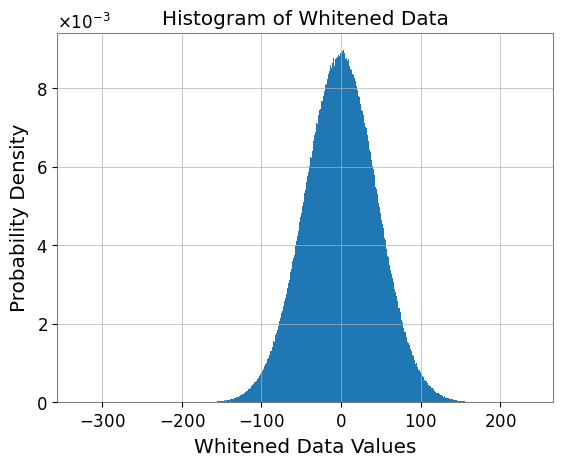

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Crop the whitened data to remove artifacts
cropped_white_data = white_data.crop(4, 4)

#find the mean and std
mu, sigma = np.mean(cropped_white_data), np.std(cropped_white_data)

print(f'Mean (mu): {mu}')
print(f'Standard Deviation (sigma): {sigma}')

#making of the histogram
plt.hist(cropped_white_data, bins='auto', density=True)
plt.title('Histogram of Whitened Data')
plt.xlabel('Whitened Data Values')
plt.ylabel('Probability Density')
plt.show()

The histogram obtained is clearly a gaussian distribution, the mean is practically zero (-0.00001)

Part 3:

In [30]:
from pycbc.filter import sigmasq
import numpy as np
from pycbc.waveform import get_fd_waveform

strain=d
strain = highpass(strain, 20.0)
strain = resample_to_delta_t(strain, 1.0/4096)
conditioned = strain.crop(2, 2)


# Assuming white_data is your time-series data after whitening
# (white_data should be a TimeSeries or FrequencySeries)
psd = conditioned.psd(4)

# Get the gravitational waveform in the frequency domain
hp, hc = get_fd_waveform(approximant="TaylorF2",
                         mass1=3,
                         mass2=3,
                         delta_f=1/4096,
                         distance=500,
                         f_lower=20.0,
                         f_final=4096)

# Specify chunk duration and overlap
chunk_duration = 16  # seconds
overlap = 8  # seconds

# Calculate SNR for each chunk
snr_values = []
for i in range(0, len(conditioned), chunk_duration - overlap):
    chunk = conditioned[i:i + chunk_duration]

    # Calculate SNR for the current chunk
    snr = (sigmasq(chunk, psd, low_frequency_cutoff=20, high_frequency_cutoff=4096))**0.5
    snr_values.append(snr)


ValueError: Waveform does not have same delta_f as psd

In [74]:
psd.delta_f

0.25